# Before Setting

In [1]:
# 필요 라이브러리 다운로드
import numpy as np
import pandas as pd
import requests
import time
import os
import ssl

from bs4 import BeautifulSoup
from urllib.parse import quote
from selenium import webdriver
from collections import Counter

In [2]:
# 크롬 드라이버 생성
driver = webdriver.Chrome(executable_path = '/Users/hyeonju/Desktop/data-crawling/chromedriver')

# 크롤링 웹사이트 url 설정
url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjBC&qvt=0&query=무료%20전시회'
print(url)

https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bjBC&qvt=0&query=무료%20전시회


In [3]:
# case 1: requests로 데이터 요청하기
# resp = requests.get(url)

# case 2: SSL 인증 제외 사이트 요청 시
resp = requests.get(url, verify=False)

# 설정한 url 로 데이터 get 함수 요청
driver.get(url)

/Users/hyeonju/opt/anaconda3/envs/mume/lib/python3.8/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'search.naver.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [8]:
# 화면상에서 스크롤 끝까지 내리기
SCROLL_PAUSE_SEC = 1

# 스크롤 높이 가져옴
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 1초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# click next page
# pagination xpath: /html/body/section/div[4]/div/div/form/div[2]/div[2]/ul
    next_page = driver.find_element_by_xpath()
    next_page.click()
    time.sleep(SCROLL_PAUSE_SEC)


<bound method Tag.prettify of <html data-platform="macintel" data-useragent="mozilla/5.0 (macintosh; intel mac os x 10_15_7) applewebkit/537.36 (khtml, like gecko) chrome/109.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="무료 전시회 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'무료 전시회'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'무료 전시회'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>무료 전시회 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="applicatio
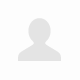
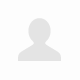

In [5]:
# 접근한 페이지의 소스코드를 텍스트로 저장 (Str)
page_text = driver.page_source

# page_text를 html list로 변환 
html = BeautifulSoup(page_text, 'html.parser')
print(html.prettify)

# Test- 네이버 무료전시 url 접근 작업중

In [12]:
# ✅ Selector: 
# /html/body/section/div[4]/div/div/form/div[2]/div[1]/ul/li[2]
# //*[@id="dataList"]
# raw url list
url=[]

for i in html.select('div.data_area > img') :
    urls = i.attrs['src']
    url.append(urls)

print(f"전시회{len(url)}개의 주소입니다.")

print(url)

전시회0개의 주소입니다.
[]


In [7]:
# ✅ Selector:

# raw url list
